## Agenda

1. What is Anaconda, Jupyter, and the notebook environment? 
2. Definitions & Orientation
3. Try to replicate Sergio's graphics. 

Hi Everyone! 
 
Welcome to Markdown. 

## This is a heading 

1. this is a list
2. of many things
3. many many things
  - many many levels
  - so many
  
| This is a table | with two columns |
|---------------|-----------------:|
| Because of those colons this column is centered | and this one is right aligned |
| you don't even need that many dashes | you can use just three |

you can write a break
***
you can do bold with **two** stars, italics with *one*, 
same with __underscores__ two vs _one_

you'll notice that line didn't break, if you skip a line in between it reads as two different paragraphs
but if you want a line break within a paragraph you need <br> then this is a new line but still together

you can do `code references` with that backwards tilde 

to run this cell you can click **Run** in the menu bar up top or use:
1. `shift + tab` to run this cell and move on to the next one.
2. `ctrl + tab` to run this cell and stay on this cell.
3. `alt + tab` to run this cell and create a new one underneath.

We can also write math with $LaTeX$. So some mathematical formula looks like this: $\sum_{n = 0}^{\infty} \frac{1}{n^{n-1}} = \ldots$. 

But that means you gotta learn some $TeX$, of which, has a steep-ish learning curve.

## Sergio's notebook that turned into a blog post with an interactive (Tableau) graphic!

# Immigration to California has steadily declined since 2000

Draft: May 3rd, 2018

Author: Sergio Sanchez

Notes: 300-400 words. 2 charts (already selected).

***
Main points: 
1. Overall immigration to California has declined drastically since 2000
2. Newly arrived immigrants (5 years or less) educational attainment has steadily increased across time. 
3. About half of newly arrived immigrants in 2016 had completed at least a Bachelor's degree. 
4. Asia surpassed Latin America as the #1 region of origin of recently arrived immigrants.

##### feel free to check out the version he did in Python, this is rewritten in R to show you the R kernel's capabilties. 

In [1]:
# libraries we need
library(readr)
library(tidyverse)
library(ggplot2)

# ppic colours palette
ppic_palette <-  c("#E98426", "#649EA5", "#0D828A", "#776972","#004A80", "#3E7AA8", "#B44B27", "#905A78", "#D2AA1D", "#73A57A")

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 2.2.1     v purrr   0.2.4
v tibble  1.4.1     v dplyr   0.7.4
v tidyr   0.7.2     v stringr 1.2.0
v ggplot2 2.2.1     v forcats 0.2.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


In [2]:
# import data
current_wd = "U:\\CLee\\STATA Playground\\jupyter playground\\201807 rats talk"

immig = read_csv(file.path(current_wd, "immigrants blog post (clean).csv"))

#col_types = cols(X1 = col_integer(), year = col_date(format = "%Y%m%d"))
# , col_types =  list(col_integer(),  col_character(), col_character(), col_double()

Warning message:
"Missing column names filled in: 'X1' [1]"Parsed with column specification:
cols(
  X1 = col_integer(),
  year = col_date(format = ""),
  bpld = col_character(),
  `agg educd` = col_character(),
  perwt = col_double()
)


In [3]:
immig %>% head()

X1,year,bpld,agg educd,perwt
0,1980-01-01,Canada,Ba Or More,2540
1,1980-01-01,Canada,Less Than Hs,3600
2,1980-01-01,Canada,Some College,3280
3,1980-01-01,St. Pierre And Miquelon,Less Than Hs,20
4,1980-01-01,Bermuda,Some College,20
5,1980-01-01,Cape Verde,Less Than Hs,40


In [39]:
# make graphic showing countries by facet (would that be too slow?)

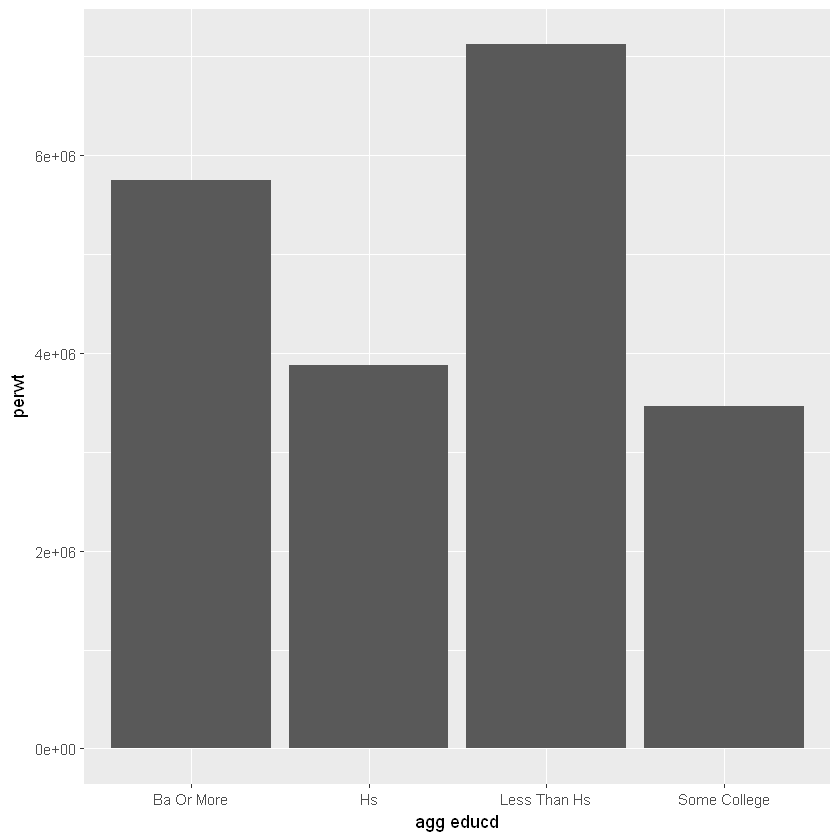

In [4]:
ggplot(data = immig, aes(x = `agg educd`, y = perwt)) + geom_bar(stat = "identity")
# the graphics engine might be a little slow

In [32]:
# filter for a smaller subset 
immig_2000 = filter(immig, year > "2000-01-01")
immig_2000 %>% head()

immig_2000_canada = filter(immig_2000, bpld == "Canada")
immig_2000_canada %>% head()

X1,year,bpld,agg educd,perwt
1208,2001-01-01,Canada,Ba Or More,9702
1209,2001-01-01,Canada,Hs,734
1210,2001-01-01,Canada,Less Than Hs,1439
1211,2001-01-01,Canada,Some College,2982
1212,2001-01-01,Bermuda,Ba Or More,237
1213,2001-01-01,"North America, Ns",Some College,215


X1,year,bpld,agg educd,perwt
1208,2001-01-01,Canada,Ba Or More,9702
1209,2001-01-01,Canada,Hs,734
1210,2001-01-01,Canada,Less Than Hs,1439
1211,2001-01-01,Canada,Some College,2982
1520,2002-01-01,Canada,Ba Or More,15830
1521,2002-01-01,Canada,Hs,1416


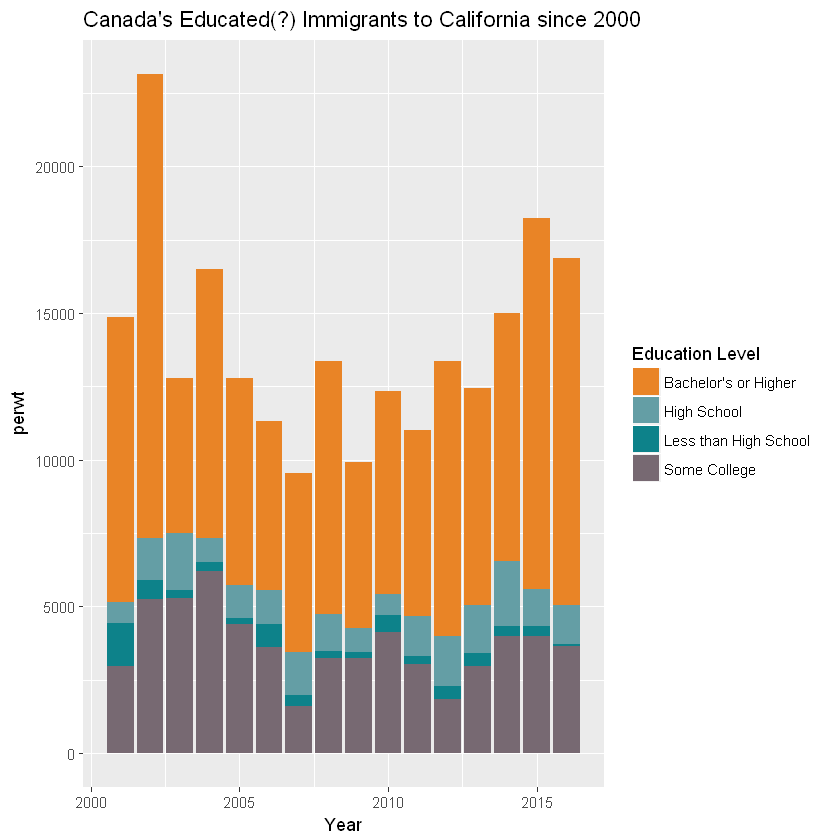

In [56]:
ggplot(data= immig_2000_canada, aes(x = year, y = perwt, fill = `agg educd`)) + geom_bar( stat = "identity") + 
    labs(title = "Canada's Educated(?) Immigrants to California since 2000", x = "Year") + 
    scale_fill_manual( values = ppic_palette, name = "Education Level", labels = c("Bachelor's or Higher", "High School","Less than High School", "Some College"))